In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ВОПРОС: При подключении диска в левой боковой части блокнота файлу) диск подключается, путь отображается, но при этом автоматически строки кода (from google/colab import drive и ниже) не добавляются (код добавлен в ручную). Правильно ли я поняла из вебинара, что если все работает, диск подключен, то код вручную можно не добавлять? При перезапуске среды выполнения каждый раз запрашивается код, так и должно быть?

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/telecom_churn.csv')

In [ ]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


настройка опций вывода таблички - 100x100 (по умолчанию 20x60)

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [ ]:
print(df.shape)

(3333, 20)


In [ ]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df['Churn'] = df['Churn'].astype('int64')

показать основные статистические характристики для числовых данных:

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


статистика по нечисловым типам показателей

In [ ]:
 df.describe(include=['object', 'bool']) 

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Смотрим целевой параметр Отток клиентов: 0 - клиент остался, 1 - потеря клиента 

In [ ]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
df['Area code'].value_counts(normalize=True)

415    0.496550
510    0.252025
408    0.251425
Name: Area code, dtype: float64

сортировка значений по убыванию (кто больше всего платит за дневные разговоры)

In [ ]:
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


сортировка по группе столбцов (кто больше всего платит за дневные разговоры, но не поменял оператора)

In [ ]:
df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


извлечение отдельного значения показателя (средний отток людей)





In [ ]:
df['Churn'].mean()

0.14491449144914492

Средние показатели для нелояльных клиентов (Отток=1, клиент ушел)

In [ ]:
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

Среднее время дневного разговора нелояльных пользователей

In [ ]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

Максимальная длина международных звонков лояльных пользователей без роуминга (2 условия+параметр)

In [ ]:
df[(df['Churn'] == 0)&(df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Срезы - первые 5 строк и указанные столбцы

In [ ]:
df.loc[0:5, 'State': 'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


Срезы - первые 5 строк и первые 3 столбца

In [ ]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


первая и последняя строчки

In [ ]:
df[:1] 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [ ]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


Применение функции к каждому столбцу: apply                         
**Почему в тексте задания у Churn стоит True, а у меня 1??? Другой тип данных?

In [ ]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

Применения функции к каждой ячейке: map (замена значений с использованием словаря d - dictionary)

In [ ]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Замена с помощью replace

In [ ]:
df = df.replace({'Voice mail plan':d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Группировка данных в зависимости от признака Churn и вывод статистики по 3 указанным столбцам

In [ ]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])


Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

Группировка и вывод перечисленных статистик с помощью agg (в describe больше статических параметров)

In [ ]:
columns_to_ahow = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

Сводные таблицы

Таблицы сопряженности по 2 параметрам - (параметр True - относительная (сумма всех = 1) и False - абсолютная частота встреч значений)

In [ ]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=False)

Voice mail plan,False,True
Churn,,
0,2008,842
1,403,80


In [ ]:
pd.crosstab(df['Churn'], df['International plan'], normalize=False)

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [ ]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


In [ ]:
pd.crosstab(df['Churn'], df['International plan'], normalize=True)

International plan,False,True
Churn,,
0,0.79928,0.055806
1,0.10381,0.041104


Среднее значение показателей, соответствующее исследуемому параметру Area code - вывод в сводную таблицу(pivot_table)

In [ ]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['Area code'],aggfunc='mean').head(10)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


Преобразование датафреймов. Добавление столбцов

In [ ]:
total_calls = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls)
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


2 ВАРИАНТ нового столбца без промежуточных Series (ПРОЩЕ!)

In [ ]:
df['Total charge'] = df['Total day charge'] + df['Total night charge'] + df['Total eve charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Назовем таблицу с полными суммарными данными:

In [ ]:
total_charge = df

In [ ]:
total_charge.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


In [ ]:
import plotly.express as px

In [ ]:
px.scatter(df, x='Total charge', y='Customer service calls', color='Churn')

По распределению количества звонков и общей платы можно увидеть 2 зоны, характеризующие недовольство (отток) пользователей: 1) количество звонков больше 3 при небольшой общей плате (до 60); 2) при общей плате от 74 и выше (с 80 процент лояльных клиентов совсем небольшой)

In [ ]:
df['Excellent charge'] = (total_charge['Total charge'] > 74).astype('int')
pd.crosstab(df['Excellent charge'], df['Churn'], margins=True)

Churn,0,1,All
Excellent charge,,,
0,2779,276,3055
1,71,207,278
All,2850,483,3333


При гипотезе: общая плата больше 74 не устраивает клиентов и они уходят, ошибка попаданий равна 10.4% (276+71 из 3333), соответственно правильных попаданий 89,6%. Платить больше 74 не готовы 207 клиентов (42.8% от всего оттока). Соответственно нужно придумывать более дешевые тарифы и уточнять за счет чего получается большая оплата.

In [ ]:
import seaborn as sns

In [ ]:
from pandas import DataFrame
columns_num0 = DataFrame(total_charge, columns=['Number vmail messages', 'Voice mail plan','Total calls', 'Total charge', 'Customer service calls', 'Churn'])

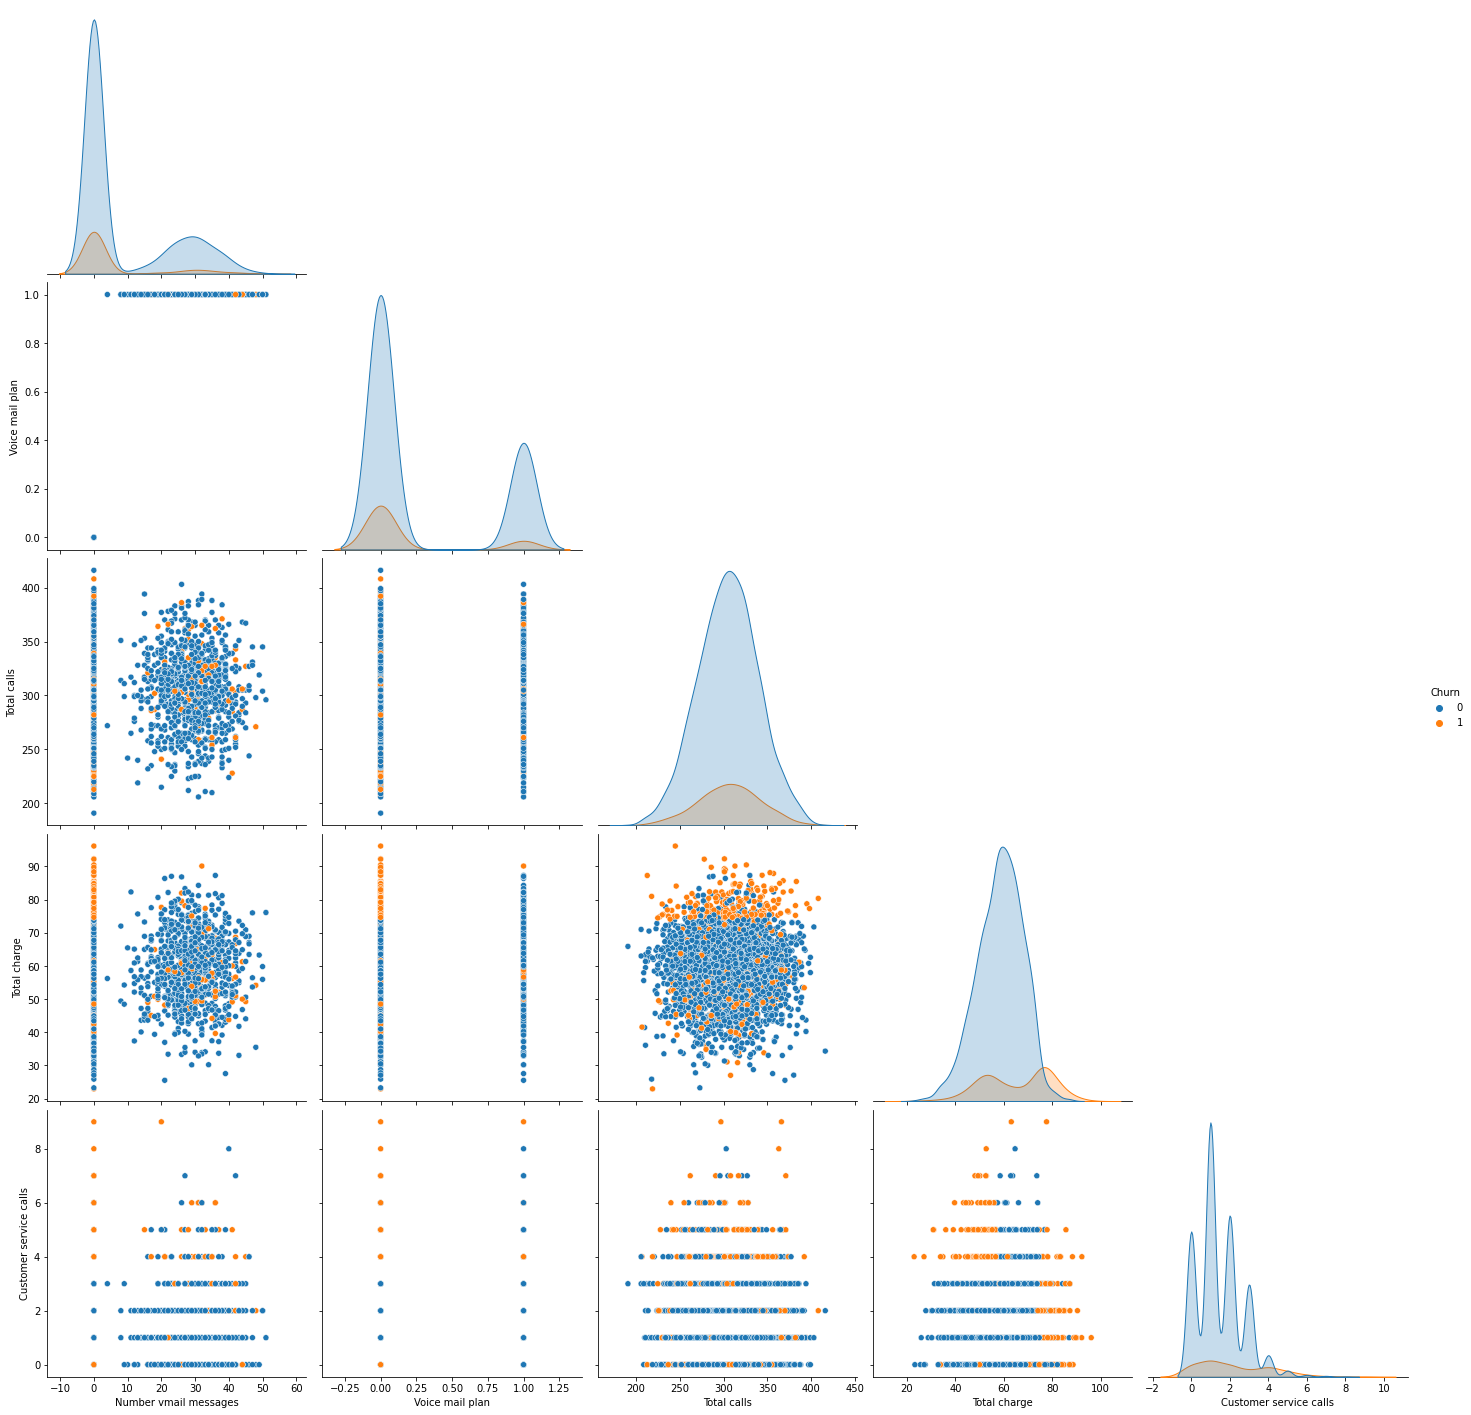

In [ ]:
sns.pairplot(
    columns_num0,
    x_vars=['Number vmail messages', 'Voice mail plan', 'Total calls', 'Total charge', 'Customer service calls'],
    y_vars=['Number vmail messages', 'Voice mail plan', 'Total calls', 'Total charge', 'Customer service calls'], corner=True, hue='Churn', height=4
)

**ГРАФИКИ ВЫШЕ НЕ ИНФОРМАТИВНЫ**

In [ ]:
df = df.drop(['Total charge', 'Total calls'], axis=1)
df.drop([1,2]).head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Excellent charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1


Связь оттока с Международным роумингом. Сводная таблица с визуализацией с Seaborn. 

In [ ]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


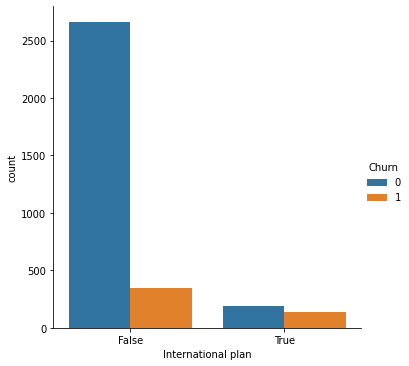

In [ ]:
sns.catplot(x='International plan', hue='Churn', kind= 'count', data=df)

ВЫвод: Большой отток при подключенном роуминге возможно недовольство из-за больших и плохо контролируемых трат в роуминге

Число обращений в сервисный центр

In [ ]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


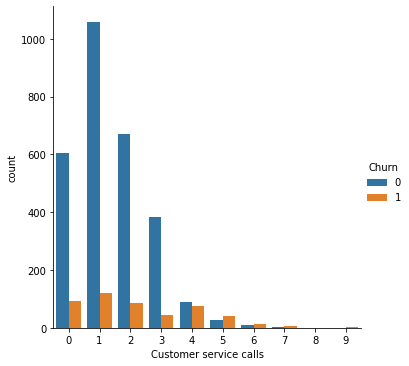

In [ ]:
sns.catplot(x='Customer service calls', hue='Churn', kind= 'count', data=df)

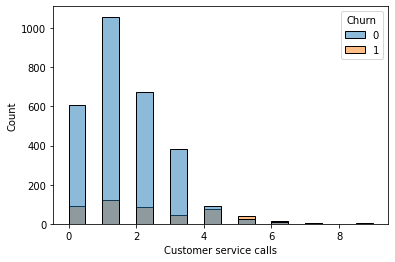

In [ ]:
sns.histplot(data=df, x="Customer service calls", binwidth=0.5, hue="Churn")

Вопрос: почему при использовании функции histplot цветовой код отображается некорректно (серый цвет вместо оранжевого)

Добавляем бинарный признак - результат сравнения Customer service calls > 3

In [ ]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')
pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


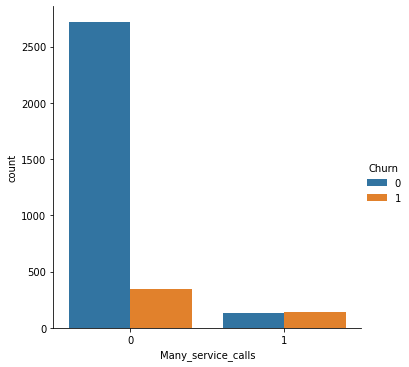

In [ ]:
sns.catplot(x='Many_service_calls', hue='Churn', kind= 'count', data=df)

In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

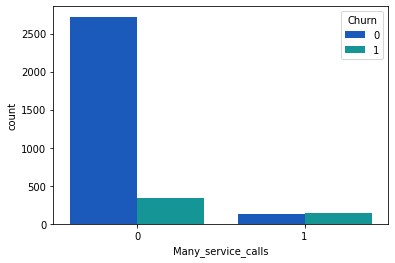

In [ ]:
sns.countplot(x='Many_service_calls', hue='Churn', palette='winter', data=df)

Объединим таблички, полученные выше

In [ ]:
pd.crosstab(df['Many_service_calls'] & df['International plan'], df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Когда число звонков в сервисный
центр больше 3 и подключен роуминг (и прогнозируя лояльность – в
противном случае), можно ожидать около 85.8% правильных попаданий
(False ошибаемся по двум параметрам всего (464 + 9 раз) из 3333 раз-14,2%). Эти 85.8%, которые мы получили с помощью
очень простых рассуждений – это неплохая отправная точка (baseline) для
дальнейших моделей машинного обучения, которые мы будем строить.

In [ ]:
from pandas import DataFrame

In [ ]:
columns_num = DataFrame(df,columns=['Total day minutes', 'Total day calls', 'Total day charge', 'Customer service calls', 'Churn'])

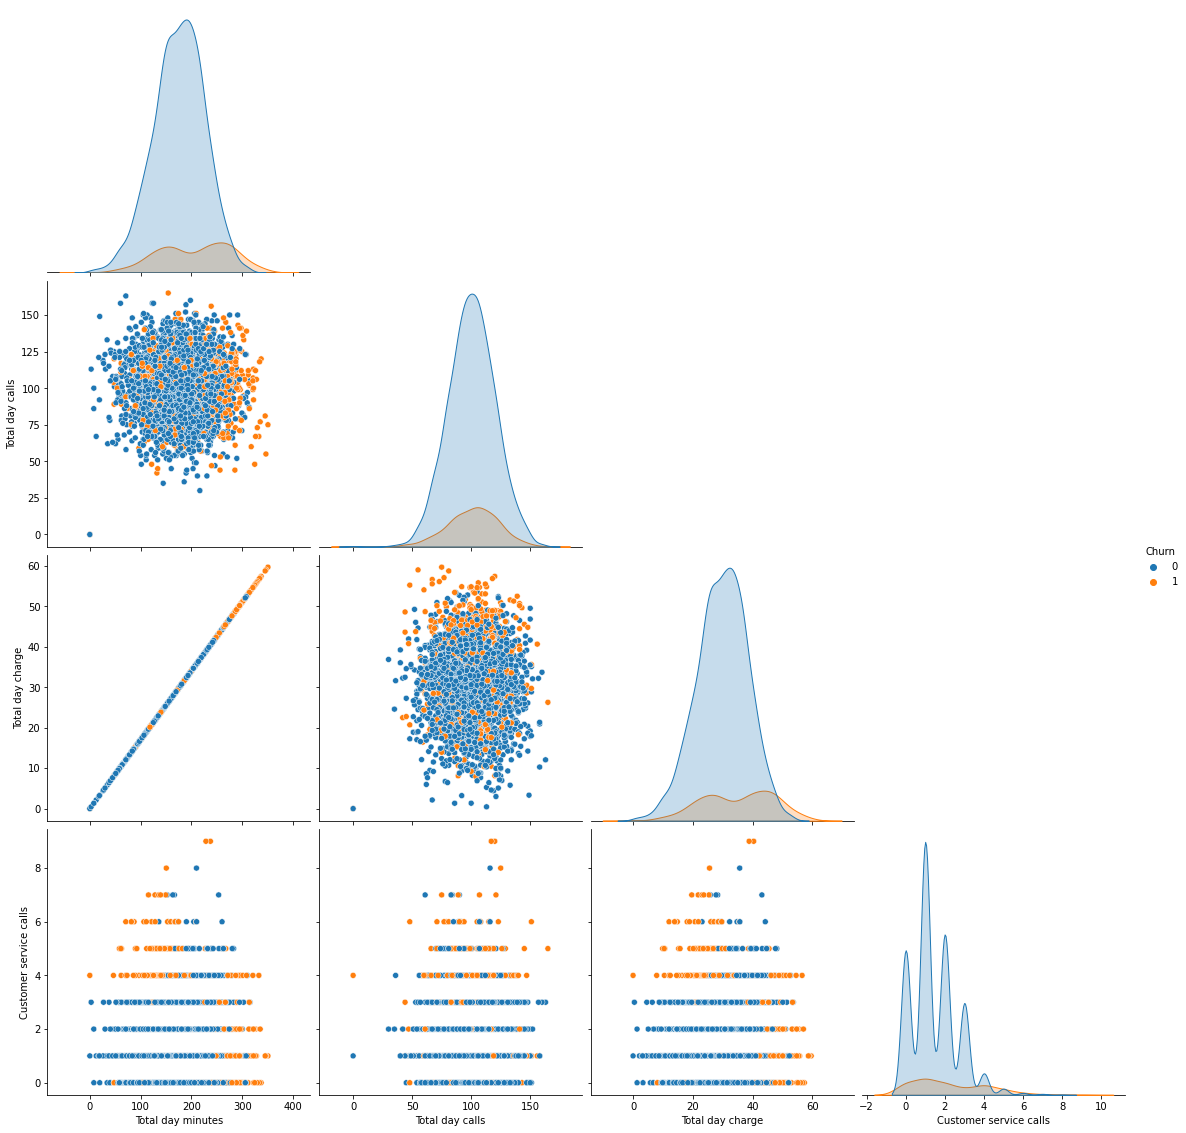

In [ ]:
sns.pairplot(
    columns_num,
    x_vars=['Total day minutes', 'Total day calls', 'Total day charge', 'Customer service calls'],
    y_vars=['Total day minutes', 'Total day calls', 'Total day charge', 'Customer service calls'], corner=True, hue='Churn', height=4
)

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(df, x='Customer service calls', color='Churn')

In [ ]:
px.histogram(df, x='Account length', color='Churn')

In [ ]:
px.histogram(df, x='State', color='Churn',)

In [ ]:
pd.crosstab(df['Churn'],df['State'], normalize=False)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
1,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


Из нелояльных штатов можно выделить NJ, TX (18 клиентов - 36 и 33%), MD (17 - 32%), что превышает средний процент оттока в 2 раза.

In [ ]:
px.box(df, x="Total day charge", y="Customer service calls", orientation="h", color="Churn", notched=True,
       )

Распределие лояльных и нелояльных клиентов: зона перекрытия при звонках до 3 включительно больше, начиная с 4 звонков зоны перекрытия практически нет и недовольство не имеет отношения к дневной плате, т.к. нелояльные клиенты платят меньше (возможно более дешевый тариф имеет ограничение по количеству времени)

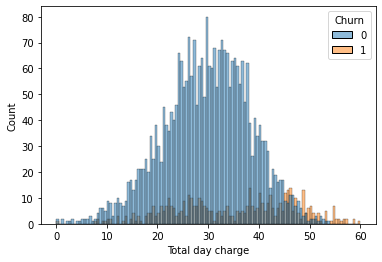

In [ ]:
sns.histplot(data=df, x="Total day charge", binwidth=0.5, hue="Churn")

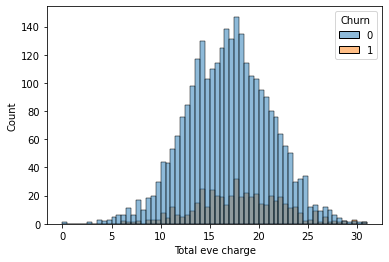

In [ ]:
sns.histplot(data=df, x="Total eve charge", binwidth=0.5, hue="Churn")

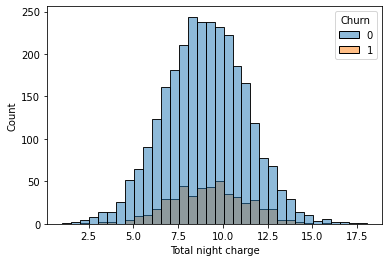

In [ ]:
sns.histplot(data=df, x="Total night charge", binwidth=0.5, hue="Churn")

По представленным выше гистограммах зависимости лояльности и платы в разное время суток можно заметить, что вечером и ночью распределение носит "нормальный" характер, в дневное время возрастание платы приводит к оттоку практически половины клиентов.

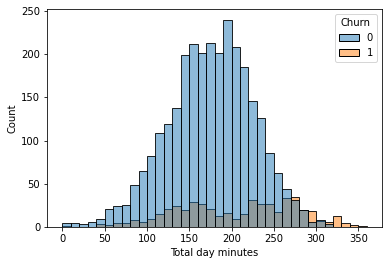

In [ ]:
sns.histplot(data=df, x="Total day minutes", binwidth=10, hue="Churn")

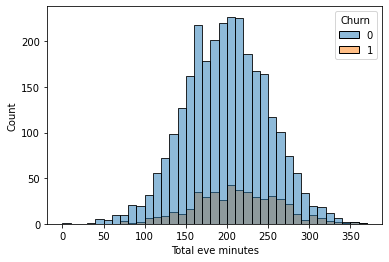

In [ ]:
sns.histplot(data=df, x="Total eve minutes", binwidth=10, hue="Churn")

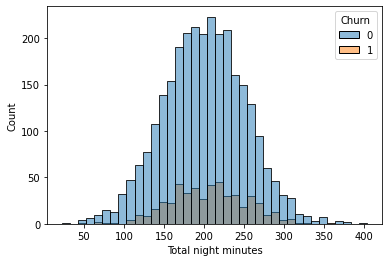

In [ ]:
sns.histplot(data=df, x="Total night minutes", binwidth=10, hue="Churn")

In [ ]:
Аналогично с зависимостью от количества минут (что логично, ведь от этого и зависит цена, если не подключены дополнительные опции, взимающие еще плату ), в дневное время среди много говорящих ((например, по работе)) пользотелей наблюдается максимальный отток клиентов. Следовательно нужно ввести тариф с фиксированной платой и безлимитом звонков, начиная с 220 минут в день например и платой 40.